In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"
import katdal
import numpy as np
import matplotlib.pylab as plt
import astropy.coordinates as ac
import functools
import healpy as hp
import optparse
import warnings
from matplotlib.backends.backend_pdf import PdfPages
import healpy as hp
from astropy import units as u
from matplotlib.offsetbox import AnchoredText
import time
import pickle
import sys
from datetime import datetime
import json
import katcali
import katcali.visualizer as kv
import katcali.models as km
import katcali.rfi as kr
import katcali.solver as ks
import katcali.io as kio
import katcali.label_dump as kl
import katcali.diode as kd
import katcali.filter as kf
import katcali.beam as kb
from astropy.coordinates import SkyCoord
from astropy import units as u
from scipy.sparse import coo_matrix
import astropy.wcs
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs.utils import pixel_to_skycoord
from astropy.io import fits
from astropy.wcs import WCS
from scipy.interpolate import UnivariateSpline
import matplotlib.colors as colors
Tcmb=2.725
k_B = 1.38E-23

In [2]:
print ('start @ ' + time.asctime(time.localtime(time.time())) +'...')

start @ Mon Jun 23 17:35:31 2025...


In [3]:
print  (plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'])
plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'] = 14, 1.5, 1.5
#plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'] = 10.0, 0.8, 1.5
print  (plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'])

10.0 0.8 1.5
14.0 1.5 1.5


In [4]:
pix_deg=0.3 #0.15 #0.3
std_sigma=6. #2023 #the smaller number will make more data be delated 

ch_plot=3200

In [5]:
p_radec=np.loadtxt('radio_source_fsky.txt')
ptr_pix=np.loadtxt('../level5/radio_sourceUHF_pix_'+str(pix_deg)+'deg.txt')
ptr_ra_pix,ptr_dec_pix=ptr_pix[:,0],ptr_pix[:,1]

In [6]:
#fname_list=['1630519596','1631379874','1631387336','1631552188','1631559762','1631659886']

In [7]:
# root_list = [
#     "level5_1675021905_20250609_150000"
# ]
# fname_list = [
#     "1675021905"
# ]

root_list = [
    "level5_1675021905_20250609_150000", "level5_1676313206_20250609_150000", "level5_1677195529_20250609_150000", 
    "level5_1678381591_20250609_150000", "level5_1679605292_20250609_150000", "level5_1675210948_20250609_150000", 
    "level5_1676657789_20250609_150000", "level5_1677777992_20250609_150000", "level5_1678467685_20250609_150000", 
    "level5_1682448988_20250609_150000", "level5_1675623808_20250609_150000", "level5_1677002481_20250609_150000", 
    "level5_1677795989_20250609_150000", "level5_1678726283_20250609_150000", "level5_1675643846_20250609_150000", 
    "level5_1677020482_20250609_150000", "level5_1678122565_20250609_150000", "level5_1678743988_20250609_150000", 
    "level5_1675816512_20250609_150000", "level5_1677174749_20250609_150000", "level5_1678295187_20250609_150000", 
    "level5_1678899080_20250609_150000", "level5_1684087370_20250609_150000"
]
fname_list = [
    "1675021905", "1676313206", "1677195529", "1678381591", "1679605292", "1675210948",
    "1676657789", "1677777992", "1678467685", "1682448988", "1675623808", "1677002481",
    "1677795989", "1678726283", "1675643846", "1677020482", "1678122565", "1678743988",
    "1675816512", "1677174749", "1678295187", "1678899080", "1684087370"
]

# try to load merged but unfiltered data

In [8]:
total_count_MAX=1119
# timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
timestamp = '20250609_150000_10'
niter=3 #2023

>>>>>>>>> Iteration 0 start...
*** No previous data cube with label *ALL_scan*,
calculate ALL_scan now...
will stop after ALL_scan calculated 
-------------------------------------------
-------------------------------------------
***stastic cubes initialized
# cube 1: 1675021905 m000
### no ch_drop!
# cube 2: 1676313206 m000
### no ch_drop!
# cube 3: 1677195529 m000
### no ch_drop!
no data cube for 1678381591, m000
# cube 4: 1679605292 m000
### no ch_drop!
# cube 5: 1675210948 m000
### no ch_drop!
# cube 6: 1676657789 m000
### no ch_drop!
# cube 7: 1677777992 m000
### no ch_drop!
# cube 8: 1678467685 m000
### no ch_drop!
# cube 9: 1682448988 m000
### no ch_drop!
# cube 10: 1675623808 m000
### no ch_drop!
# cube 11: 1677002481 m000
### no ch_drop!
# cube 12: 1677795989 m000
### no ch_drop!
# cube 13: 1678726283 m000
### no ch_drop!
# cube 14: 1675643846 m000
### no ch_drop!
# cube 15: 1677020482 m000
### no ch_drop!
no data cube for 1678122565, m000
# cube 16: 1678743988 m000
### no ch

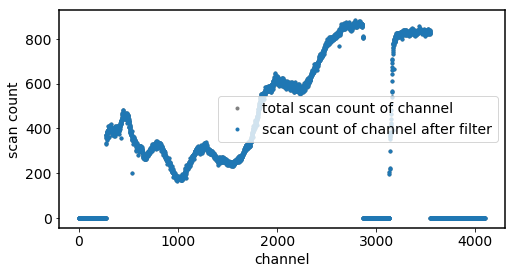

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:306: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:307: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:308: RuntimeWarning: invalid value encountered in true_divide


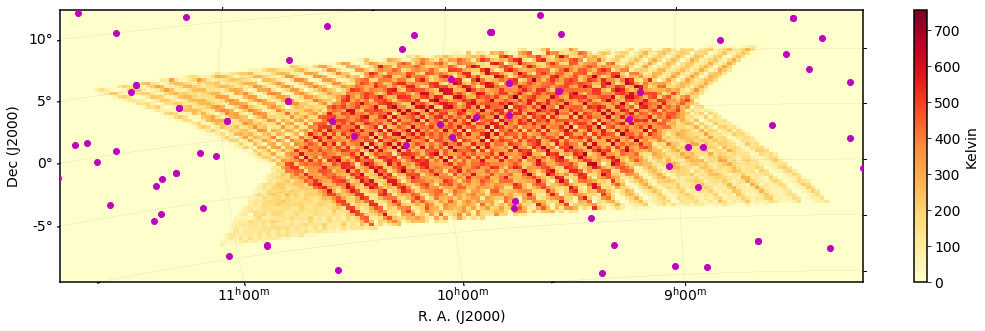

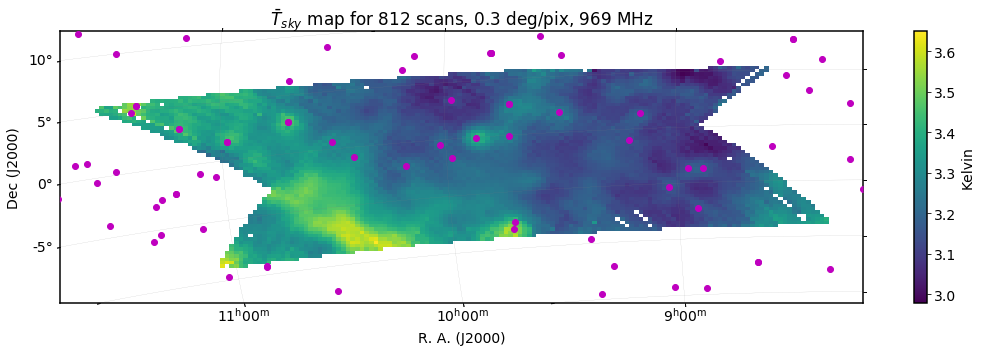

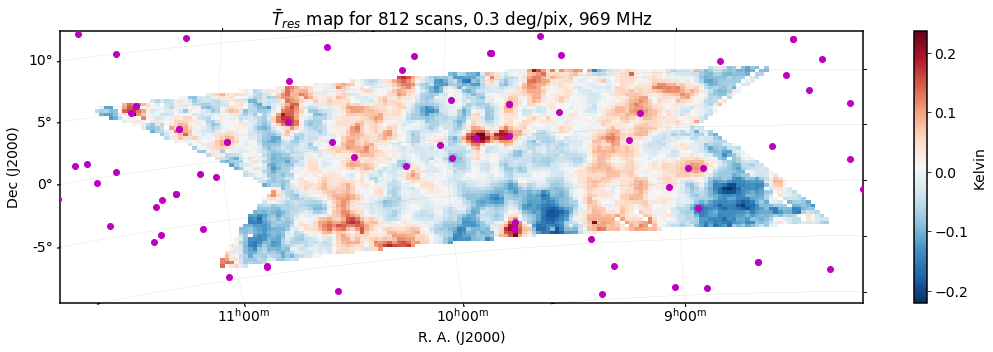

1119
ALL_scan finished, will EXIT soon ...
ALL_scan finished, will EXIT soon ...
ALL_scan finished, will EXIT soon ...
ALL_scan finished, will EXIT soon ...
ALL_scan finished, will EXIT soon ...
ALL_scan finished, will EXIT soon ...
ALL_scan finished, will EXIT soon ...
>>>>>>>>> Iteration 1 start...
*** No data cube for iter 0, EXIT!


In [9]:
# This cell should be executed twice. First time it will iterate by only once and just prform the map superposition.
# The second time it will iterate by "niter" times to remove the outliers.
# The second time we run this cell should insure "total_count_MAX" and "timestamp" to be right.
input_file='../level5/results/py_results/sigma40/'
output_file=f'./results/jupyter_results/{timestamp}/'
os.makedirs(output_file, exist_ok=True)

pix_ma_ra=[]
pix_ma_dec=[]

for i_iter in range(niter):
    print ('>>>>>>>>> Iteration '+str(i_iter)+' start...')
    
    ####load previous data in########
    try:
        if i_iter==0:#First
            Fits=output_file+'ALL_scan'+str(total_count_MAX)+'_Tresi_cube_p'+str(pix_deg)+'d.fits'
            Tresi_cube = fits.open(Fits)[0].data
            print (np.shape(Tresi_cube))
            #only need to load once###
            Npix_x= np.shape(Tresi_cube)[0]
            Npix_y= np.shape(Tresi_cube)[1]

            w2=WCS(Fits).dropaxis(-1)
            print (w2)
            
            ####mask point sources######    
            map_ra=np.zeros_like(Tresi_cube[:,:,ch_plot])
            map_dec=np.zeros_like(Tresi_cube[:,:,ch_plot])
            for i in range(np.shape(map_ra)[0]):
                for j in range(np.shape(map_ra)[1]):
                    radec=pixel_to_skycoord(i,j,w2)
                    map_ra[i,j]=radec.ra.deg
                    map_dec[i,j]=radec.dec.deg
            p = SkyCoord(map_ra*u.deg,  map_dec*u.deg, frame='icrs')

            for s in range(len(p_radec)):
                p_ra,p_dec=p_radec[s]
                c = SkyCoord(p_ra*u.deg,  p_dec*u.deg, frame='icrs')
                p_ang=(c.separation(p)/u.deg)
                dp_l=np.where(p_ang<1.)
                dp_l=np.array(dp_l)
                pix_ma_ra+=list(dp_l[0])
                pix_ma_dec+=list(dp_l[1])
                
        if i_iter>0: #Since second
            Fits=output_file+'Nscan'+str(total_count)+'_Tresi_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter-1)+'.fits'
                            
        Tresi_cube = fits.open(Fits)[0].data
        print (np.shape(Tresi_cube))

        plt.figure(figsize=(18,5))
        ax=plt.subplot(projection=w2)
        plt.imshow(Tresi_cube[:,:,ch_plot].T,cmap='jet',aspect='auto')
        plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
        #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
        plt.colorbar(label='Kelvin')
        plt.xlabel('R. A. (J2000)')
        plt.ylabel('Dec (J2000)')
        plt.xlim([0,Npix_x])
        plt.ylim([0,Npix_y])
        ax.invert_xaxis()
        plt.title('reloaded data')
        plt.show()

        print (np.nanmin(Tresi_cube[:,:,ch_plot]),np.nanmax(Tresi_cube[:,:,ch_plot])) 

        Tresi_cube1=Tresi_cube.copy()
        Tresi_cube1[pix_ma_ra,pix_ma_dec,:]=np.nan
        print (np.nanmean(Tresi_cube1[:,:,ch_plot]),np.nanstd(Tresi_cube1[:,:,ch_plot])) 

        plt.figure(figsize=(18,5))
        ax=plt.subplot(projection=w2)
        plt.imshow(Tresi_cube1[:,:,ch_plot].T,cmap='jet',aspect='auto')
        plt.colorbar(label='Kelvin')
        plt.xlabel('R. A. (J2000)')
        plt.ylabel('Dec (J2000)')
        plt.xlim([0,Npix_x])
        plt.ylim([0,Npix_y])
        ax.invert_xaxis()
        plt.show()
 
        ######calculate std without point sources################
        ''' #2023
        Tresi_ra_std=np.nanstd(Tresi_cube1,axis=0)
        Tresi_ra_mean=np.nanmean(Tresi_cube1,axis=0)

        Tresi_ra_u=Tresi_ra_mean+std_sigma*Tresi_ra_std
        Tresi_ra_l=Tresi_ra_mean-std_sigma*Tresi_ra_std

        x_ticks=pixel_to_skycoord(0,range(np.shape(Tresi_cube)[1]),w2).dec/u.deg #pix_ra=0, get dec
        x_ticks=np.array(x_ticks)
        assert(np.shape(Tresi_cube)[1]==len(x_ticks))
        
        plt.figure(figsize=(8,4))
        plt.plot(Tresi_ra_mean[:,ch_plot],'r')
        plt.plot(Tresi_ra_u[:,ch_plot],'b--')
        plt.plot(Tresi_ra_l[:,ch_plot],'g--')
        
        tick_i=[0, 10, 20, 30, 40]
        plt.xticks(tick_i, np.round(x_ticks[tick_i],1))
        plt.xlabel('${Dec_{pix}}$ (Deg)')
        plt.ylabel('T (K)')
        plt.legend(['mean','mean+3sigma','mean-3sigma'],ncol=3)
        plt.title('$T_{res}$ along dec of ch'+str(ch_plot)+', all scans')
        plt.grid(color='grey', lw=.1)
        plt.savefig('Tresi_filter_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
        plt.show()
        ''' #2023
        #2023 below
        Fits_Tresi_std=output_file+'ALL_scan'+str(total_count_MAX)+'_Tresi_std_cube_p'+str(pix_deg)+'d.fits' #2023
        Tresi_std = fits.open(Fits_Tresi_std)[0].data #2023
        Tresi_u=Tresi_cube1+std_sigma*Tresi_std #2023
        Tresi_l=Tresi_cube1-std_sigma*Tresi_std #2023
        
        plt.figure(figsize=(18,5))
        ax=plt.subplot(projection=w2)
        plt.imshow(Tresi_std[:,:,ch_plot].T,cmap='jet',aspect='auto')
        plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
        plt.colorbar(label='Kelvin')
        plt.xlabel('R. A. (J2000)')
        plt.ylabel('Dec (J2000)')
        plt.xlim([0,Npix_x])
        plt.ylim([0,Npix_y])
        ax.invert_xaxis()
        plt.title('reloaded Tresi_std')
        plt.show()
        #2023 above
        
    except IOError:
        if i_iter==0:#First
            print ('*** No previous data cube with label *ALL_scan*,',)
            print ('calculate ALL_scan now...',)
            print ('will stop after ALL_scan calculated ')
            Fits=input_file+root_list[0]+'/'+fname_list[0]+'_m005'+'/'+fname_list[0]+'_m005_Tresi_xy_p'+str(pix_deg)+'d.fits'
            Tresi_cube = fits.open(Fits)[0].data
            Tresi_u=np.ones_like(Tresi_cube)*1e3 #2023
            Tresi_l=np.ones_like(Tresi_cube)*-1e3 #2023
        else:
            print ('*** No data cube for iter '+str(i_iter-1)+', EXIT!')
            break
         
    #######filter data##########################
    n_ch_del=0
    n_ch_keep=0
    total_count=0 #cube count
    total_count_plot=0 #channel count
    total_count_list=np.zeros(4096)
    
    for a_i in range(64):
        ant='m'+ "%03d" % a_i
        #print ant

        for f_i in range(len(fname_list)):
            fname=fname_list[f_i]
            root_dir = root_list[f_i]
            #print fname

            try:
                #print 'set ch_mask'
                a=np.ma.array(np.zeros(4096),mask=True)
                ch_mask=a.mask
                
                Fits1=input_file+root_dir+'/'+fname+'_'+ant+'/'+fname+'_'+ant+'_Tsky_xy_p'+str(pix_deg)+'d.fits'
                Tsky_cube = fits.open(Fits1)[0].data
                Fits2=input_file+root_dir+'/'+fname+'_'+ant+'/'+fname+'_'+ant+'_Tresi_xy_p'+str(pix_deg)+'d.fits'
                Tresi_cube = fits.open(Fits2)[0].data
                Fits3=input_file+root_dir+'/'+fname+'_'+ant+'/'+fname+'_'+ant+'_Npix_xy_count_p'+str(pix_deg)+'d.fits'
                Pcount_cube = fits.open(Fits3)[0].data
                
                assert(np.shape(Tsky_cube)==np.shape(Tresi_cube))
                assert((np.isnan(Tresi_cube)).all()==False)
                if (np.isnan(Tsky_cube)).all()==False: 
                    total_count+=1 #cube count
                    for ch_ii in range(4096):
                        if (np.isnan(Tsky_cube[:,:,ch_ii])).all()==False:
                            ch_mask[ch_ii]=False
                else:
                    print ('***empty cube')

                if (total_count==1):
                    # Initializing. Running only once
                    Npix_x= np.shape(Tsky_cube)[0]
                    Npix_y= np.shape(Tsky_cube)[1]

                    w=WCS(Fits1).dropaxis(-1)
                    w2=WCS(Fits2).dropaxis(-1)
                    assert(w.wcs==w2.wcs)
                    print ('-------------------------------------------')
                    #print w
                    print ('-------------------------------------------')
                    fits_temp=np.zeros([Npix_x,Npix_y,4096])

                    Sum_Tsky_xy=fits_temp.copy()
                    Sum_Tresi_xy=fits_temp.copy()
                    Npix_xy_count1=fits_temp.copy()
                    Npix_xy_count2=fits_temp.copy()
                    P_xy_count1=fits_temp.copy()
                    P_xy_count2=fits_temp.copy()
                    Sum_Tresi_sq_xy=fits_temp.copy() #2023
                    assert((Sum_Tsky_xy==0).all()==True)
                    assert((Sum_Tresi_xy==0).all()==True)
                    assert((Npix_xy_count1==0).all()==True)
                    assert((Npix_xy_count2==0).all()==True)
                    print ('***stastic cubes initialized')

                print ('# cube '+str(total_count)+': '+fname+' '+ant)
                assert(np.shape(Tsky_cube)==np.shape(Sum_Tsky_xy))
                
                if (Tresi_u==1000).all()==True: #2023
                    print ('### no ch_drop!')
                else:
                    
                    #mean along dec to check rfi lines
                    Tresi_cube1=Tresi_cube.copy()
                    Tresi_cube1[pix_ma_ra,pix_ma_dec,:]=np.nan
                    # 2023 Tresi_ra_median=np.nanmedian(Tresi_cube1,axis=0) #always check Tresi since Tsky have the Galactic slope 

                    ch_drop=[]  
                    for ch_i in range(4096):
                        if ((Tresi_cube1[:,:,ch_i]<Tresi_l[:,:,ch_i]).any()==True 
                            or (Tresi_cube1[:,:,ch_i]>Tresi_u[:,:,ch_i]).any()==True): #2023
                            ch_drop.append(ch_i)

                    if len(ch_drop)>0:
                        Tsky_cube[:,:,ch_drop]=np.nan            
                        Tresi_cube[:,:,ch_drop]=np.nan
                        print ('***'+str(len(ch_drop))+' channels deleted')
                        n_ch_del+=len(ch_drop)
                        ch_mask[ch_drop]=True
                        
                    ch_l=len(np.where(ch_mask==False)[0])
                    n_ch_keep+=ch_l
                    print ('***'+str(ch_l)+' channels left')
                    d1={}
                    d1['ch_mask']=ch_mask
                    fs=open(output_file+str(fname)+'_'+str(ant)+'_level6_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'_mask','wb')
                    pickle.dump(d1,fs,protocol=2)
                    fs.close()
                       
                Sum_Tsky_xy[~np.isnan(Tsky_cube)]+=Tsky_cube[~np.isnan(Tsky_cube)]
                Sum_Tresi_xy[~np.isnan(Tresi_cube)]+=Tresi_cube[~np.isnan(Tresi_cube)]
                Sum_Tresi_sq_xy[~np.isnan(Tresi_cube)]+=Tresi_cube[~np.isnan(Tresi_cube)]**2 #2023
                Npix_xy_count1[~np.isnan(Tsky_cube)]+=1
                Npix_xy_count2[~np.isnan(Tresi_cube)]+=1
                P_xy_count1[~np.isnan(Tsky_cube)]+=Pcount_cube[~np.isnan(Tsky_cube)]
                P_xy_count2[~np.isnan(Tresi_cube)]+=Pcount_cube[~np.isnan(Tresi_cube)]
                if (np.isnan(Tsky_cube[:,:,ch_plot])).all()==False: #channel count
                    total_count_plot+=1
                    
                local_ch_count=0 #2023
                for ch_i in list(range(272,2869)) + list(range(3133,3547)):##set channels
                    if (np.isnan(Tsky_cube[:,:,ch_i])).all()==False: #channel count
                        total_count_list[ch_i]+=1
                        local_ch_count+=1 #2023
                #2023 below        
                text_local=fname+' '+ant+' '+str(local_ch_count)+'\n'
                #print (text_local)
                if (Tresi_u==1000).all()==True: #2023
                    f=open(output_file+'ch_count_ALL.dat','a')
                else:    
                    f=open(output_file+'ch_count_iter'+str(i_iter)+'.dat','a')
                f.writelines(text_local)
                f.close()
                #2023 above
            except IOError:
                print ('no data cube for '+ fname+', '+ant)
    
    ######check and save data#####
    print (n_ch_del)
    print ('total channel number left: '+str(n_ch_keep))

    if (Tresi_u==1000).all()==True: #2023
        np.savetxt(output_file+'ALL_scan'+str(total_count)+'_list_p'+str(pix_deg)+'d.dat',total_count_list)
        print ('list for ALL_scan saved')
    else:
        np.savetxt(output_file+'Nscan'+str(total_count)+'_list_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.dat',total_count_list)
        print ('list for Iter'+str(i_iter)+' saved')
        
    assert(total_count_list[ch_plot]==total_count_plot)

    m=np.where(total_count_list==total_count_list.max())
    print (m,total_count_list[m])

    plt.figure(figsize=(8,4))
    #plt.plot(total_count_list,'.')
    ###plt.plot(ch_plot,total_count_plot,'r*')
    ###plt.plot(m,total_count_list[m],'g*')
    plt.xlabel('channel')
    plt.ylabel('scan count')
    try:
        total_count_list0=np.loadtxt(output_file+'ALL_scan'+str(total_count)+'_list_p'+str(pix_deg)+'d.dat')
        print (total_count_list0)
        plt.plot(total_count_list0,'.',color='grey')
        
    except IOError:
        print ('*** No previous data cube')
    #plt.legend(['scan count of channel after filter','total scan count of channel'])
    plt.plot(total_count_list,'.')
    plt.legend(['total scan count of channel','scan count of channel after filter'])
    
    if i_iter==niter-1:
        plt.savefig(output_file+'count_comp_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
    plt.show()

    Tsky_xy=Sum_Tsky_xy/Npix_xy_count1
    Tresi_xy=Sum_Tresi_xy/Npix_xy_count2
    Tresi_xy_std=np.sqrt(Sum_Tresi_sq_xy/Npix_xy_count1-Tresi_xy**2) #2023
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    plt.imshow(Npix_xy_count1[:,:,ch_plot].T,cmap=kv.cmap3(),aspect='auto')
    plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
    #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if (Tresi_u==1000).all()==True: #2023:
        plt.savefig(output_file+'ALL_count'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    else:
        plt.savefig(output_file+'Ncount'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    # plt.imshow(Tsky_xy[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto',vmin=2.9,vmax=3.55)
    plt.imshow(Tsky_xy[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto')
    plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
    #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.title(r'$\bar T_{sky}$'+' map for '+str(total_count_plot)+' scans, '+str(pix_deg)+' deg/pix, '
                                  +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if (Tresi_u==1000).all()==True: #2023:
        plt.savefig(output_file+'F_Tsky_ALL_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    else:
        plt.savefig(output_file+'F_Tsky_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()

    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    # plt.imshow(Tresi_xy[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto',vmin=-0.25, vmax=0.25)
    plt.imshow(Tresi_xy[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto')
    plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
    #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
    #plt.text(ptr_ra_pix[19]-0.8,ptr_dec_pix[19]+0.8,'4C+00.35')    
    
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.title(r'$\bar T_{res}$'+' map for '+str(total_count_plot)+' scans, '+str(pix_deg)+' deg/pix, '
                                  +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if (Tresi_u==1000).all()==True: #2023:
        plt.savefig(output_file+'F_Tresi_ALL_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    else:
        plt.savefig(output_file+'F_Tresi_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()

    assert((Npix_xy_count1==Npix_xy_count2).all())
    assert((P_xy_count1==P_xy_count2).all())
    print (total_count)
    
    #save data
    
    list_data=[Sum_Tsky_xy,Sum_Tresi_xy,Npix_xy_count1,Tsky_xy,Tresi_xy, P_xy_count1,Tresi_xy_std] #2023
    list_str=['Sum_Tsky_cube','Sum_Tresi_cube','Npix_count_cube','Tsky_cube','Tresi_cube','P_xy_count','Tresi_std_cube'] #2023
    for i in range(len(list_data)):
        hdu=w.to_fits()
        hdu[0].data=list_data[i]
        #if (std_list0==1000).all()==True:
        if (Tresi_u==1000).all()==True: #2023
            hdu.writeto(output_file+'ALL_scan'+str(total_count)+'_'+list_str[i]+'_p'+str(pix_deg)+'d.fits', overwrite=True)
            print ('ALL_scan finished, will EXIT soon ...')
        else:    
            hdu.writeto(output_file+'Nscan'+str(total_count)+'_'+list_str[i]+'_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.fits', overwrite=True)

metadata = {
    "root_list": root_list,
    "fname_list": fname_list,
    "total_count_MAX": total_count_MAX,
    "niter": niter,
    "pix_deg": pix_deg,
    "std_sigma": std_sigma,
    "ch_plot": ch_plot,
    "total_count_plot": total_count_plot
}
metadata_path = os.path.join(output_file, f"metadata.json")
with open(metadata_path, "w") as f:
    json.dump(metadata, f, indent=4)

>>>>>>>>> Iteration 0 start...
(173, 81, 4096)
WCS Transformation

This transformation has 2 pixel and 2 world dimensions

Array shape (Numpy order): (173, 81, 4096)

Pixel Dim  Data size  Bounds
        0       4096  None
        1         81  None

World Dim  Physical Type  Units
        0  pos.eq.ra      deg
        1  pos.eq.dec     deg

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes  yes
        1  yes  yes
(173, 81, 4096)


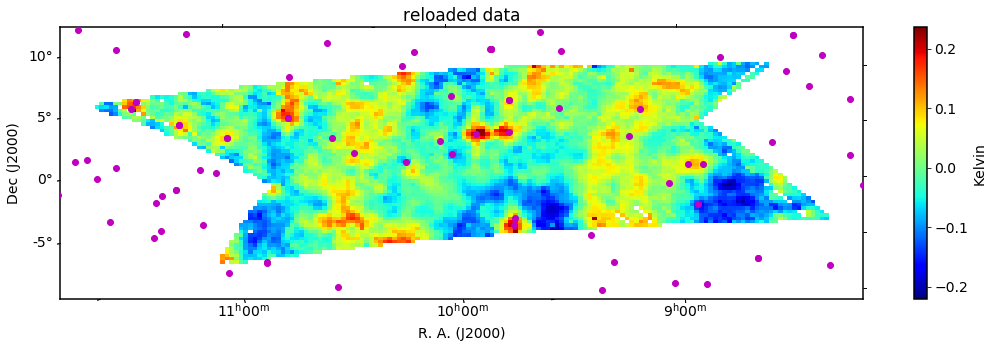

-0.22025844417282264 0.23623959930944405
-0.01256515923635899 0.0630734783171622


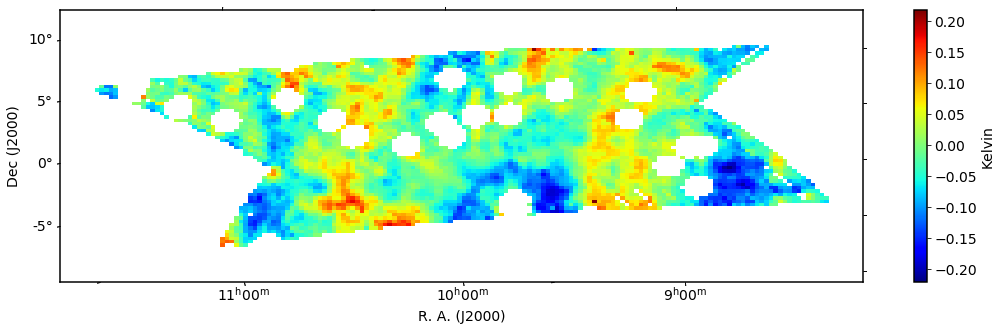

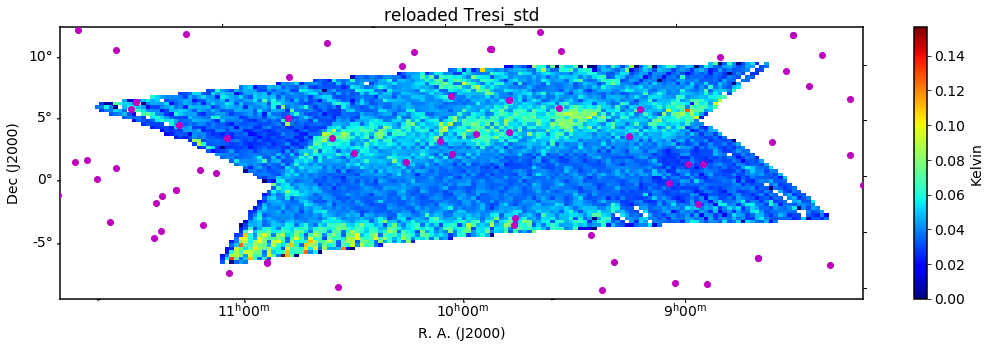

-------------------------------------------
-------------------------------------------
***stastic cubes initialized
# cube 1: 1675021905 m000
***1079 channels left
# cube 2: 1676313206 m000
***1 channels deleted
***905 channels left
# cube 3: 1677195529 m000
***34 channels deleted
***346 channels left
no data cube for 1678381591, m000
# cube 4: 1679605292 m000
***104 channels deleted
***1717 channels left
# cube 5: 1675210948 m000
***1634 channels left
# cube 6: 1676657789 m000
***411 channels left
# cube 7: 1677777992 m000
***1 channels deleted
***395 channels left
# cube 8: 1678467685 m000
***1 channels deleted
***1171 channels left
# cube 9: 1682448988 m000
***1 channels deleted
***2349 channels left
# cube 10: 1675623808 m000
***5 channels deleted
***776 channels left
# cube 11: 1677002481 m000
***1294 channels left
# cube 12: 1677795989 m000
***1 channels deleted
***1594 channels left
# cube 13: 1678726283 m000
***6 channels deleted
***2655 channels left
# cube 14: 1675643846 m00

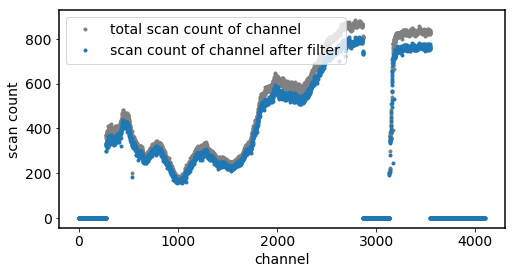

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:306: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:307: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:308: RuntimeWarning: invalid value encountered in true_divide


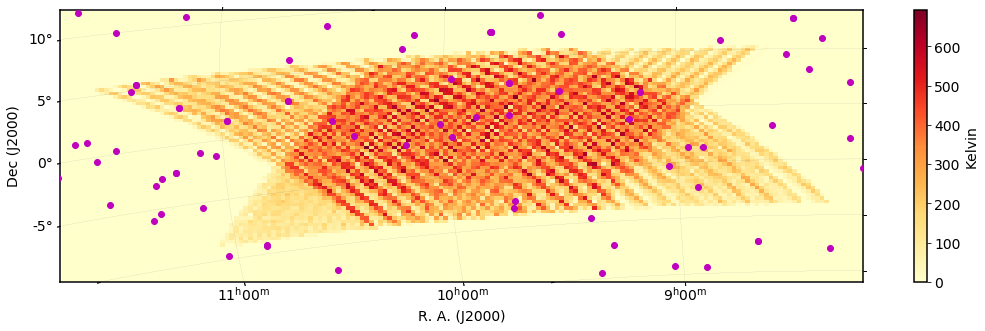

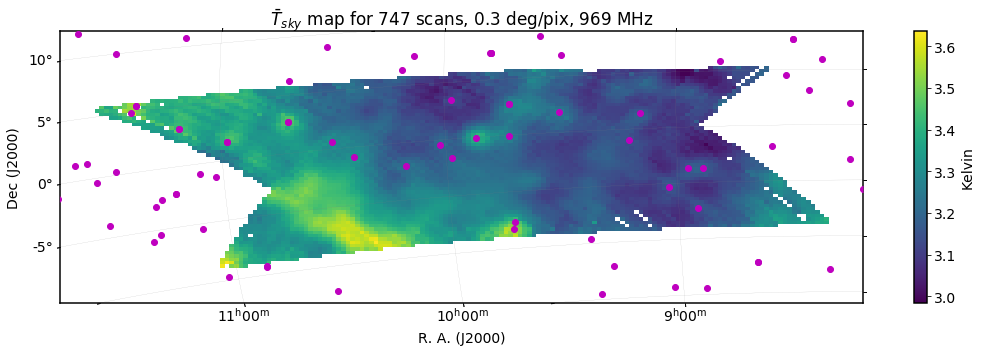

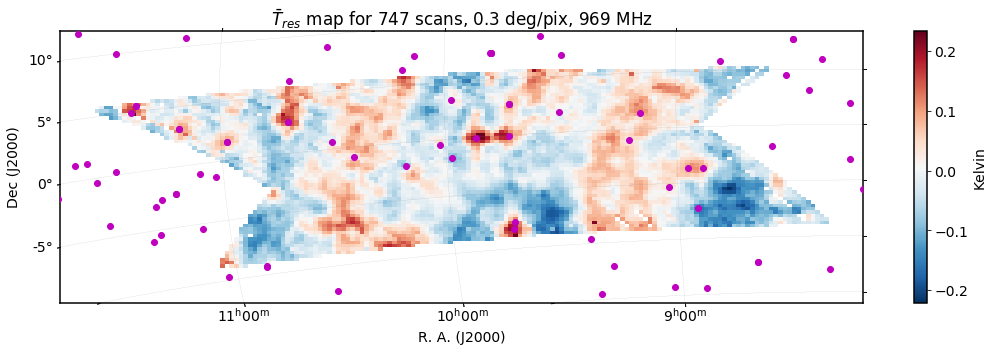

1119
>>>>>>>>> Iteration 1 start...
(173, 81, 4096)


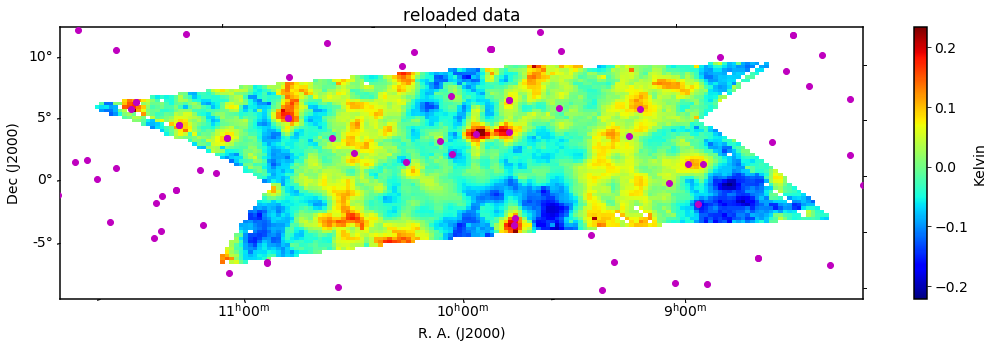

-0.22104362360018026 0.233832149542014
-0.012351839216973753 0.0626769421548883


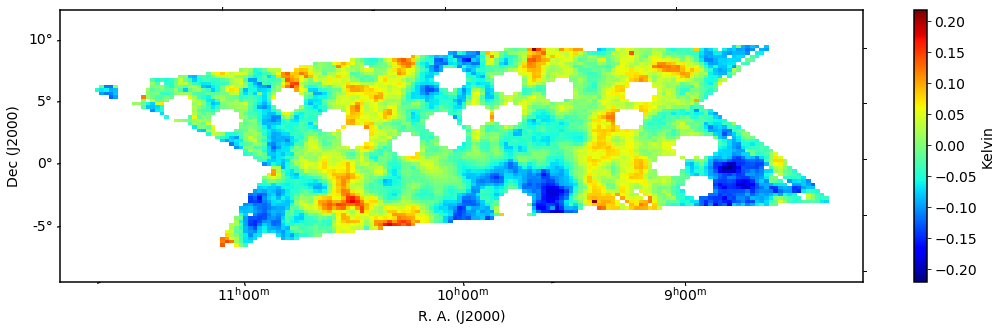

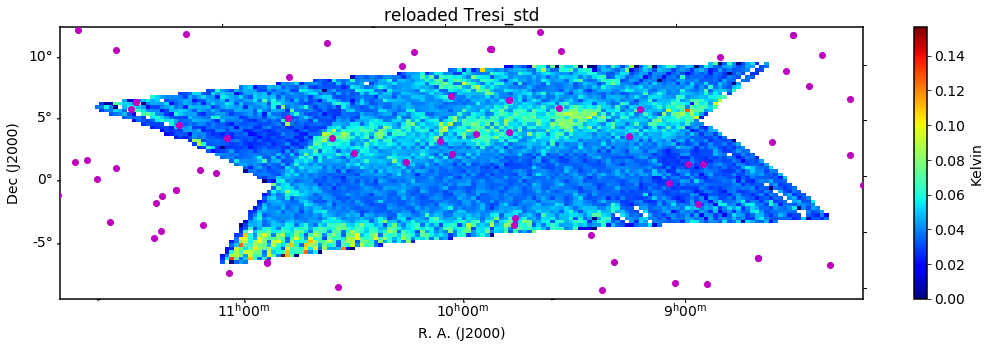

-------------------------------------------
-------------------------------------------
***stastic cubes initialized
# cube 1: 1675021905 m000
***1079 channels left
# cube 2: 1676313206 m000
***1 channels deleted
***905 channels left
# cube 3: 1677195529 m000
***34 channels deleted
***346 channels left
no data cube for 1678381591, m000
# cube 4: 1679605292 m000
***116 channels deleted
***1705 channels left
# cube 5: 1675210948 m000
***1634 channels left
# cube 6: 1676657789 m000
***411 channels left
# cube 7: 1677777992 m000
***1 channels deleted
***395 channels left
# cube 8: 1678467685 m000
***1 channels deleted
***1171 channels left
# cube 9: 1682448988 m000
***1 channels deleted
***2349 channels left
# cube 10: 1675623808 m000
***5 channels deleted
***776 channels left
# cube 11: 1677002481 m000
***1294 channels left
# cube 12: 1677795989 m000
***1 channels deleted
***1594 channels left
# cube 13: 1678726283 m000
***6 channels deleted
***2655 channels left
# cube 14: 1675643846 m00

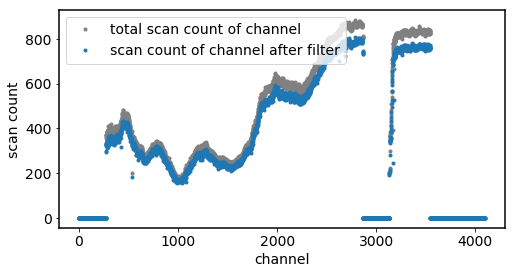

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:306: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:307: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:308: RuntimeWarning: invalid value encountered in true_divide


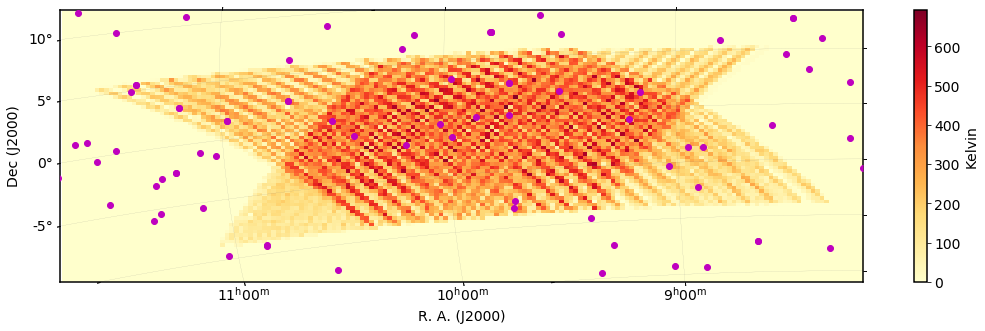

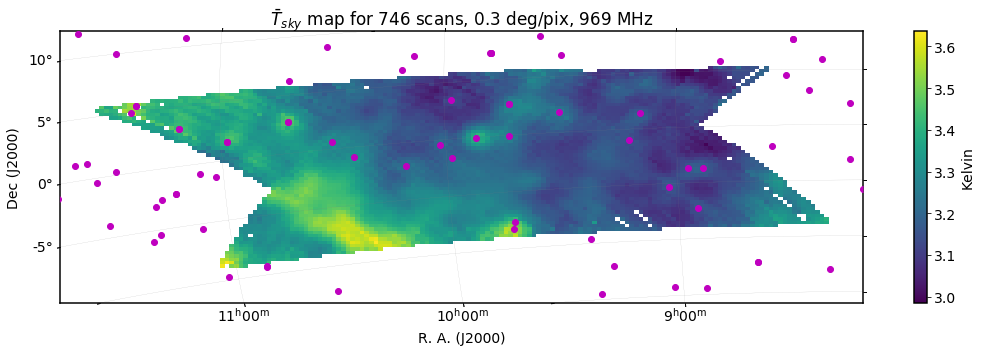

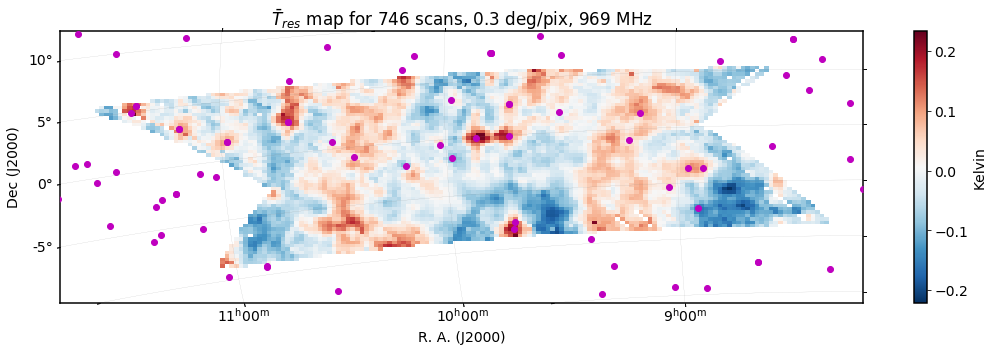

1119
>>>>>>>>> Iteration 2 start...
(173, 81, 4096)


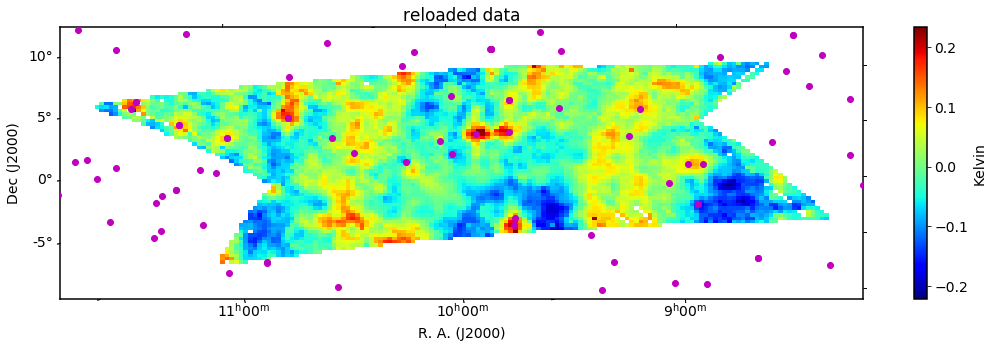

-0.22104362360018026 0.23357624817074796
-0.012348886413479115 0.06264997975659412


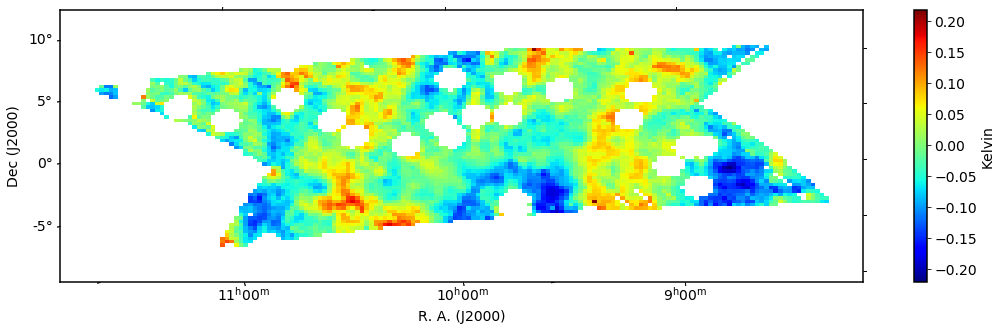

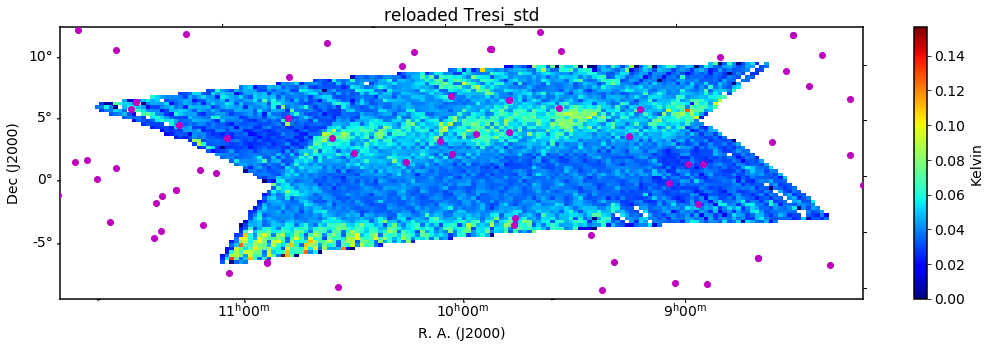

-------------------------------------------
-------------------------------------------
***stastic cubes initialized
# cube 1: 1675021905 m000
***1079 channels left
# cube 2: 1676313206 m000
***1 channels deleted
***905 channels left
# cube 3: 1677195529 m000
***34 channels deleted
***346 channels left
no data cube for 1678381591, m000
# cube 4: 1679605292 m000
***116 channels deleted
***1705 channels left
# cube 5: 1675210948 m000
***1634 channels left
# cube 6: 1676657789 m000
***411 channels left
# cube 7: 1677777992 m000
***1 channels deleted
***395 channels left
# cube 8: 1678467685 m000
***1 channels deleted
***1171 channels left
# cube 9: 1682448988 m000
***1 channels deleted
***2349 channels left
# cube 10: 1675623808 m000
***5 channels deleted
***776 channels left
# cube 11: 1677002481 m000
***1294 channels left
# cube 12: 1677795989 m000
***1 channels deleted
***1594 channels left
# cube 13: 1678726283 m000
***6 channels deleted
***2655 channels left
# cube 14: 1675643846 m00

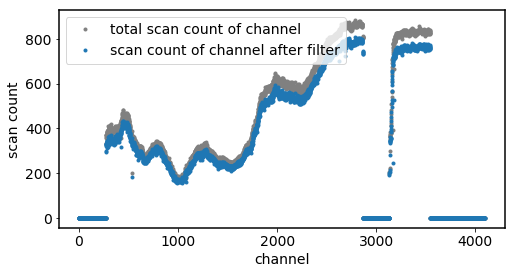

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:306: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:307: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:308: RuntimeWarning: invalid value encountered in true_divide


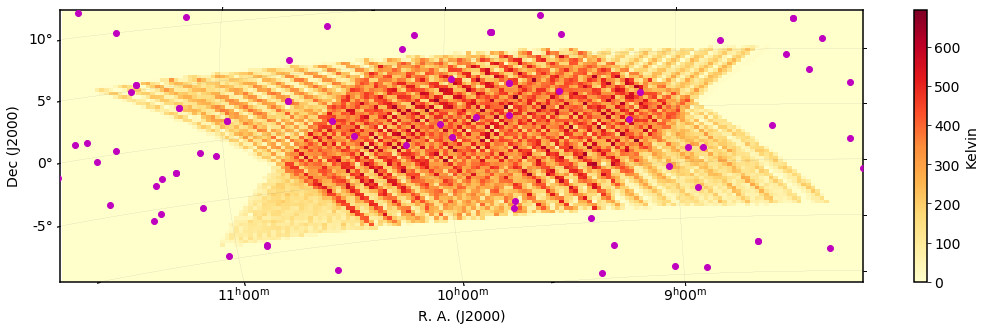

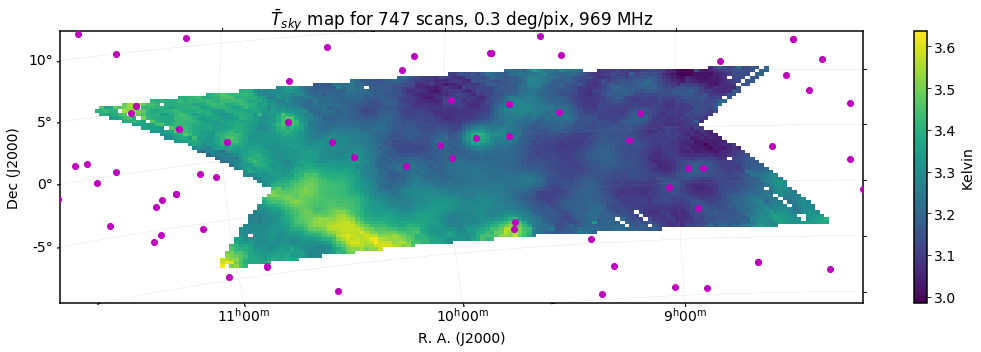

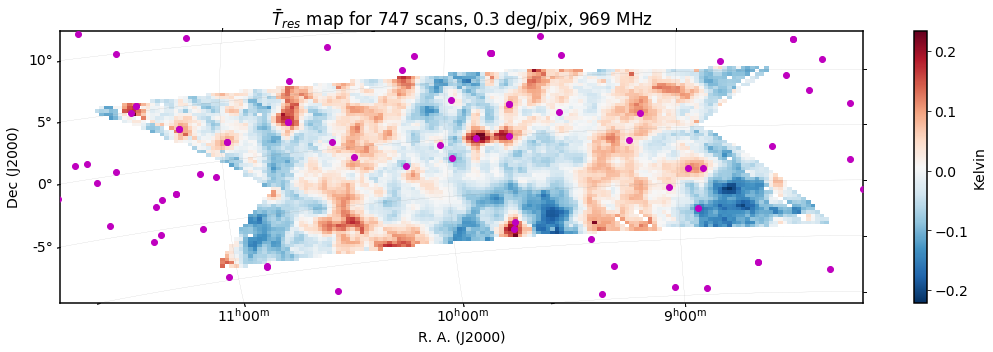

1119


In [10]:
# This cell should be executed twice. First time it will iterate by only once and just prform the map superposition.
# The second time it will iterate by "niter" times to remove the outliers.
# The second time we run this cell should insure "total_count_MAX" and "timestamp" to be right.
input_file='../level5/results/py_results/sigma40/'
output_file=f'./results/jupyter_results/{timestamp}/'
os.makedirs(output_file, exist_ok=True)

pix_ma_ra=[]
pix_ma_dec=[]

for i_iter in range(niter):
    print ('>>>>>>>>> Iteration '+str(i_iter)+' start...')
    
    ####load previous data in########
    try:
        if i_iter==0:#First
            Fits=output_file+'ALL_scan'+str(total_count_MAX)+'_Tresi_cube_p'+str(pix_deg)+'d.fits'
            Tresi_cube = fits.open(Fits)[0].data
            print (np.shape(Tresi_cube))
            #only need to load once###
            Npix_x= np.shape(Tresi_cube)[0]
            Npix_y= np.shape(Tresi_cube)[1]

            w2=WCS(Fits).dropaxis(-1)
            print (w2)
            
            ####mask point sources######    
            map_ra=np.zeros_like(Tresi_cube[:,:,ch_plot])
            map_dec=np.zeros_like(Tresi_cube[:,:,ch_plot])
            for i in range(np.shape(map_ra)[0]):
                for j in range(np.shape(map_ra)[1]):
                    radec=pixel_to_skycoord(i,j,w2)
                    map_ra[i,j]=radec.ra.deg
                    map_dec[i,j]=radec.dec.deg
            p = SkyCoord(map_ra*u.deg,  map_dec*u.deg, frame='icrs')

            for s in range(len(p_radec)):
                p_ra,p_dec=p_radec[s]
                c = SkyCoord(p_ra*u.deg,  p_dec*u.deg, frame='icrs')
                p_ang=(c.separation(p)/u.deg)
                dp_l=np.where(p_ang<1.)
                dp_l=np.array(dp_l)
                pix_ma_ra+=list(dp_l[0])
                pix_ma_dec+=list(dp_l[1])
                
        if i_iter>0: #Since second
            Fits=output_file+'Nscan'+str(total_count)+'_Tresi_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter-1)+'.fits'
                            
        Tresi_cube = fits.open(Fits)[0].data
        print (np.shape(Tresi_cube))

        plt.figure(figsize=(18,5))
        ax=plt.subplot(projection=w2)
        plt.imshow(Tresi_cube[:,:,ch_plot].T,cmap='jet',aspect='auto')
        plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
        #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
        plt.colorbar(label='Kelvin')
        plt.xlabel('R. A. (J2000)')
        plt.ylabel('Dec (J2000)')
        plt.xlim([0,Npix_x])
        plt.ylim([0,Npix_y])
        ax.invert_xaxis()
        plt.title('reloaded data')
        plt.show()

        print (np.nanmin(Tresi_cube[:,:,ch_plot]),np.nanmax(Tresi_cube[:,:,ch_plot])) 

        Tresi_cube1=Tresi_cube.copy()
        Tresi_cube1[pix_ma_ra,pix_ma_dec,:]=np.nan
        print (np.nanmean(Tresi_cube1[:,:,ch_plot]),np.nanstd(Tresi_cube1[:,:,ch_plot])) 

        plt.figure(figsize=(18,5))
        ax=plt.subplot(projection=w2)
        plt.imshow(Tresi_cube1[:,:,ch_plot].T,cmap='jet',aspect='auto')
        plt.colorbar(label='Kelvin')
        plt.xlabel('R. A. (J2000)')
        plt.ylabel('Dec (J2000)')
        plt.xlim([0,Npix_x])
        plt.ylim([0,Npix_y])
        ax.invert_xaxis()
        plt.show()
 
        ######calculate std without point sources################
        ''' #2023
        Tresi_ra_std=np.nanstd(Tresi_cube1,axis=0)
        Tresi_ra_mean=np.nanmean(Tresi_cube1,axis=0)

        Tresi_ra_u=Tresi_ra_mean+std_sigma*Tresi_ra_std
        Tresi_ra_l=Tresi_ra_mean-std_sigma*Tresi_ra_std

        x_ticks=pixel_to_skycoord(0,range(np.shape(Tresi_cube)[1]),w2).dec/u.deg #pix_ra=0, get dec
        x_ticks=np.array(x_ticks)
        assert(np.shape(Tresi_cube)[1]==len(x_ticks))
        
        plt.figure(figsize=(8,4))
        plt.plot(Tresi_ra_mean[:,ch_plot],'r')
        plt.plot(Tresi_ra_u[:,ch_plot],'b--')
        plt.plot(Tresi_ra_l[:,ch_plot],'g--')
        
        tick_i=[0, 10, 20, 30, 40]
        plt.xticks(tick_i, np.round(x_ticks[tick_i],1))
        plt.xlabel('${Dec_{pix}}$ (Deg)')
        plt.ylabel('T (K)')
        plt.legend(['mean','mean+3sigma','mean-3sigma'],ncol=3)
        plt.title('$T_{res}$ along dec of ch'+str(ch_plot)+', all scans')
        plt.grid(color='grey', lw=.1)
        plt.savefig('Tresi_filter_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
        plt.show()
        ''' #2023
        #2023 below
        Fits_Tresi_std=output_file+'ALL_scan'+str(total_count_MAX)+'_Tresi_std_cube_p'+str(pix_deg)+'d.fits' #2023
        Tresi_std = fits.open(Fits_Tresi_std)[0].data #2023
        Tresi_u=Tresi_cube1+std_sigma*Tresi_std #2023
        Tresi_l=Tresi_cube1-std_sigma*Tresi_std #2023
        
        plt.figure(figsize=(18,5))
        ax=plt.subplot(projection=w2)
        plt.imshow(Tresi_std[:,:,ch_plot].T,cmap='jet',aspect='auto')
        plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
        plt.colorbar(label='Kelvin')
        plt.xlabel('R. A. (J2000)')
        plt.ylabel('Dec (J2000)')
        plt.xlim([0,Npix_x])
        plt.ylim([0,Npix_y])
        ax.invert_xaxis()
        plt.title('reloaded Tresi_std')
        plt.show()
        #2023 above
        
    except IOError:
        if i_iter==0:#First
            print ('*** No previous data cube with label *ALL_scan*,',)
            print ('calculate ALL_scan now...',)
            print ('will stop after ALL_scan calculated ')
            Fits=input_file+root_list[0]+'/'+fname_list[0]+'_m005'+'/'+fname_list[0]+'_m005_Tresi_xy_p'+str(pix_deg)+'d.fits'
            Tresi_cube = fits.open(Fits)[0].data
            Tresi_u=np.ones_like(Tresi_cube)*1e3 #2023
            Tresi_l=np.ones_like(Tresi_cube)*-1e3 #2023
        else:
            print ('*** No data cube for iter '+str(i_iter-1)+', EXIT!')
            break
         
    #######filter data##########################
    n_ch_del=0
    n_ch_keep=0
    total_count=0 #cube count
    total_count_plot=0 #channel count
    total_count_list=np.zeros(4096)
    
    for a_i in range(64):
        ant='m'+ "%03d" % a_i
        #print ant

        for f_i in range(len(fname_list)):
            fname=fname_list[f_i]
            root_dir = root_list[f_i]
            #print fname

            try:
                #print 'set ch_mask'
                a=np.ma.array(np.zeros(4096),mask=True)
                ch_mask=a.mask
                
                Fits1=input_file+root_dir+'/'+fname+'_'+ant+'/'+fname+'_'+ant+'_Tsky_xy_p'+str(pix_deg)+'d.fits'
                Tsky_cube = fits.open(Fits1)[0].data
                Fits2=input_file+root_dir+'/'+fname+'_'+ant+'/'+fname+'_'+ant+'_Tresi_xy_p'+str(pix_deg)+'d.fits'
                Tresi_cube = fits.open(Fits2)[0].data
                Fits3=input_file+root_dir+'/'+fname+'_'+ant+'/'+fname+'_'+ant+'_Npix_xy_count_p'+str(pix_deg)+'d.fits'
                Pcount_cube = fits.open(Fits3)[0].data
                
                assert(np.shape(Tsky_cube)==np.shape(Tresi_cube))
                assert((np.isnan(Tresi_cube)).all()==False)
                if (np.isnan(Tsky_cube)).all()==False: 
                    total_count+=1 #cube count
                    for ch_ii in range(4096):
                        if (np.isnan(Tsky_cube[:,:,ch_ii])).all()==False:
                            ch_mask[ch_ii]=False
                else:
                    print ('***empty cube')

                if (total_count==1):
                    # Initializing. Running only once
                    Npix_x= np.shape(Tsky_cube)[0]
                    Npix_y= np.shape(Tsky_cube)[1]

                    w=WCS(Fits1).dropaxis(-1)
                    w2=WCS(Fits2).dropaxis(-1)
                    assert(w.wcs==w2.wcs)
                    print ('-------------------------------------------')
                    #print w
                    print ('-------------------------------------------')
                    fits_temp=np.zeros([Npix_x,Npix_y,4096])

                    Sum_Tsky_xy=fits_temp.copy()
                    Sum_Tresi_xy=fits_temp.copy()
                    Npix_xy_count1=fits_temp.copy()
                    Npix_xy_count2=fits_temp.copy()
                    P_xy_count1=fits_temp.copy()
                    P_xy_count2=fits_temp.copy()
                    Sum_Tresi_sq_xy=fits_temp.copy() #2023
                    assert((Sum_Tsky_xy==0).all()==True)
                    assert((Sum_Tresi_xy==0).all()==True)
                    assert((Npix_xy_count1==0).all()==True)
                    assert((Npix_xy_count2==0).all()==True)
                    print ('***stastic cubes initialized')

                print ('# cube '+str(total_count)+': '+fname+' '+ant)
                assert(np.shape(Tsky_cube)==np.shape(Sum_Tsky_xy))
                
                if (Tresi_u==1000).all()==True: #2023
                    print ('### no ch_drop!')
                else:
                    
                    #mean along dec to check rfi lines
                    Tresi_cube1=Tresi_cube.copy()
                    Tresi_cube1[pix_ma_ra,pix_ma_dec,:]=np.nan
                    # 2023 Tresi_ra_median=np.nanmedian(Tresi_cube1,axis=0) #always check Tresi since Tsky have the Galactic slope 

                    ch_drop=[]  
                    for ch_i in range(4096):
                        if ((Tresi_cube1[:,:,ch_i]<Tresi_l[:,:,ch_i]).any()==True 
                            or (Tresi_cube1[:,:,ch_i]>Tresi_u[:,:,ch_i]).any()==True): #2023
                            ch_drop.append(ch_i)

                    if len(ch_drop)>0:
                        Tsky_cube[:,:,ch_drop]=np.nan            
                        Tresi_cube[:,:,ch_drop]=np.nan
                        print ('***'+str(len(ch_drop))+' channels deleted')
                        n_ch_del+=len(ch_drop)
                        ch_mask[ch_drop]=True
                        
                    ch_l=len(np.where(ch_mask==False)[0])
                    n_ch_keep+=ch_l
                    print ('***'+str(ch_l)+' channels left')
                    d1={}
                    d1['ch_mask']=ch_mask
                    fs=open(output_file+str(fname)+'_'+str(ant)+'_level6_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'_mask','wb')
                    pickle.dump(d1,fs,protocol=2)
                    fs.close()
                       
                Sum_Tsky_xy[~np.isnan(Tsky_cube)]+=Tsky_cube[~np.isnan(Tsky_cube)]
                Sum_Tresi_xy[~np.isnan(Tresi_cube)]+=Tresi_cube[~np.isnan(Tresi_cube)]
                Sum_Tresi_sq_xy[~np.isnan(Tresi_cube)]+=Tresi_cube[~np.isnan(Tresi_cube)]**2 #2023
                Npix_xy_count1[~np.isnan(Tsky_cube)]+=1
                Npix_xy_count2[~np.isnan(Tresi_cube)]+=1
                P_xy_count1[~np.isnan(Tsky_cube)]+=Pcount_cube[~np.isnan(Tsky_cube)]
                P_xy_count2[~np.isnan(Tresi_cube)]+=Pcount_cube[~np.isnan(Tresi_cube)]
                if (np.isnan(Tsky_cube[:,:,ch_plot])).all()==False: #channel count
                    total_count_plot+=1
                    
                local_ch_count=0 #2023
                for ch_i in list(range(272,2869)) + list(range(3133,3547)):##set channels
                    if (np.isnan(Tsky_cube[:,:,ch_i])).all()==False: #channel count
                        total_count_list[ch_i]+=1
                        local_ch_count+=1 #2023
                #2023 below        
                text_local=fname+' '+ant+' '+str(local_ch_count)+'\n'
                #print (text_local)
                if (Tresi_u==1000).all()==True: #2023
                    f=open(output_file+'ch_count_ALL.dat','a')
                else:    
                    f=open(output_file+'ch_count_iter'+str(i_iter)+'.dat','a')
                f.writelines(text_local)
                f.close()
                #2023 above
            except IOError:
                print ('no data cube for '+ fname+', '+ant)
    
    ######check and save data#####
    print (n_ch_del)
    print ('total channel number left: '+str(n_ch_keep))

    if (Tresi_u==1000).all()==True: #2023
        np.savetxt(output_file+'ALL_scan'+str(total_count)+'_list_p'+str(pix_deg)+'d.dat',total_count_list)
        print ('list for ALL_scan saved')
    else:
        np.savetxt(output_file+'Nscan'+str(total_count)+'_list_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.dat',total_count_list)
        print ('list for Iter'+str(i_iter)+' saved')
        
    assert(total_count_list[ch_plot]==total_count_plot)

    m=np.where(total_count_list==total_count_list.max())
    print (m,total_count_list[m])

    plt.figure(figsize=(8,4))
    #plt.plot(total_count_list,'.')
    ###plt.plot(ch_plot,total_count_plot,'r*')
    ###plt.plot(m,total_count_list[m],'g*')
    plt.xlabel('channel')
    plt.ylabel('scan count')
    try:
        total_count_list0=np.loadtxt(output_file+'ALL_scan'+str(total_count)+'_list_p'+str(pix_deg)+'d.dat')
        print (total_count_list0)
        plt.plot(total_count_list0,'.',color='grey')
        
    except IOError:
        print ('*** No previous data cube')
    #plt.legend(['scan count of channel after filter','total scan count of channel'])
    plt.plot(total_count_list,'.')
    plt.legend(['total scan count of channel','scan count of channel after filter'])
    
    if i_iter==niter-1:
        plt.savefig(output_file+'count_comp_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
    plt.show()

    Tsky_xy=Sum_Tsky_xy/Npix_xy_count1
    Tresi_xy=Sum_Tresi_xy/Npix_xy_count2
    Tresi_xy_std=np.sqrt(Sum_Tresi_sq_xy/Npix_xy_count1-Tresi_xy**2) #2023
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    plt.imshow(Npix_xy_count1[:,:,ch_plot].T,cmap=kv.cmap3(),aspect='auto')
    plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
    #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if (Tresi_u==1000).all()==True: #2023:
        plt.savefig(output_file+'ALL_count'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    else:
        plt.savefig(output_file+'Ncount'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    # plt.imshow(Tsky_xy[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto',vmin=2.9,vmax=3.55)
    plt.imshow(Tsky_xy[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto')
    plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
    #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.title(r'$\bar T_{sky}$'+' map for '+str(total_count_plot)+' scans, '+str(pix_deg)+' deg/pix, '
                                  +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if (Tresi_u==1000).all()==True: #2023:
        plt.savefig(output_file+'F_Tsky_ALL_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    else:
        plt.savefig(output_file+'F_Tsky_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()

    plt.figure(figsize=(18,5))
    ax=plt.subplot(projection=w)
    plt.grid(color='grey',lw=.1)
    # plt.imshow(Tresi_xy[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto',vmin=-0.25, vmax=0.25)
    plt.imshow(Tresi_xy[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto')
    plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
    #plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
    #plt.text(ptr_ra_pix[19]-0.8,ptr_dec_pix[19]+0.8,'4C+00.35')    
    
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A. (J2000)')
    plt.ylabel('Dec (J2000)')
    plt.title(r'$\bar T_{res}$'+' map for '+str(total_count_plot)+' scans, '+str(pix_deg)+' deg/pix, '
                                  +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    ax.invert_xaxis()
    if (Tresi_u==1000).all()==True: #2023:
        plt.savefig(output_file+'F_Tresi_ALL_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    else:
        plt.savefig(output_file+'F_Tresi_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.png', bbox_inches='tight')
    plt.show()

    assert((Npix_xy_count1==Npix_xy_count2).all())
    assert((P_xy_count1==P_xy_count2).all())
    print (total_count)
    
    #save data
    
    list_data=[Sum_Tsky_xy,Sum_Tresi_xy,Npix_xy_count1,Tsky_xy,Tresi_xy, P_xy_count1,Tresi_xy_std] #2023
    list_str=['Sum_Tsky_cube','Sum_Tresi_cube','Npix_count_cube','Tsky_cube','Tresi_cube','P_xy_count','Tresi_std_cube'] #2023
    for i in range(len(list_data)):
        hdu=w.to_fits()
        hdu[0].data=list_data[i]
        #if (std_list0==1000).all()==True:
        if (Tresi_u==1000).all()==True: #2023
            hdu.writeto(output_file+'ALL_scan'+str(total_count)+'_'+list_str[i]+'_p'+str(pix_deg)+'d.fits', overwrite=True)
            print ('ALL_scan finished, will EXIT soon ...')
        else:    
            hdu.writeto(output_file+'Nscan'+str(total_count)+'_'+list_str[i]+'_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.fits', overwrite=True)

metadata = {
    "root_list": root_list,
    "fname_list": fname_list,
    "total_count_MAX": total_count_MAX,
    "niter": niter,
    "pix_deg": pix_deg,
    "std_sigma": std_sigma,
    "ch_plot": ch_plot,
    "total_count_plot": total_count_plot
}
metadata_path = os.path.join(output_file, f"metadata.json")
with open(metadata_path, "w") as f:
    json.dump(metadata, f, indent=4)

In [16]:
total_count_MAX=371
niter=3 #2023 
timestamp = '20250609_150000_500'
input_file='../level5/results/py_results/'
output_file=f'./results/jupyter_results/{timestamp}/'

Fits1=input_file+root_list[-1]+'/'+fname_list[-1]+'_m005/'+fname_list[-1]+'_m005_Tsky_xy_p'+str(pix_deg)+'d.fits'
w=WCS(Fits1).dropaxis(-1)

hdul = fits.open(output_file+f'ALL_scan{total_count_MAX}_Tresi_cube_p'+str(pix_deg)+'d.fits')
Tresi_xy = hdul[0].data
print(Tresi_xy.shape)
hdul.close()

metadata_path = os.path.join(output_file, f"metadata.json")
with open(metadata_path, "r", encoding="utf-8") as f:
    metadata = json.load(f)
total_count_plot = metadata['total_count_plot']

Fits1=input_file+root_list[-1]+'/'+fname_list[-1]+'_m005/'+fname_list[-1]+'_m005_Tsky_xy_p'+str(pix_deg)+'d.fits'
Tsky_cube = fits.open(Fits1)[0].data
Npix_x = np.shape(Tsky_cube)[0]
Npix_y = np.shape(Tsky_cube)[1]

plt.figure(figsize=(18,5))
ax=plt.subplot(projection=w)
plt.grid(color='grey',lw=.1)
plt.imshow(Tresi_xy[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto',vmin=-0.3, vmax=0.3)
# plt.imshow(Tresi_xy[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto')
plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
#plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
#plt.text(ptr_ra_pix[19]-0.8,ptr_dec_pix[19]+0.8,'4C+00.35')    

plt.colorbar(label='Kelvin')
plt.xlabel('R. A. (J2000)')
plt.ylabel('Dec (J2000)')
plt.title(r'$\bar T_{res}$'+' map for '+str(total_count_plot)+' scans, '+str(pix_deg)+' deg/pix, '
                              +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
ax.invert_xaxis()
plt.show()

(173, 81, 4096)


../level5/results/py_results/level5_1678899080_20250609_150000/1678899080_m005/1 [astropy.io.fits.card]
678899080_m005_Tsky_xy_p0.3d.fits                                                [astropy.io.fits.card]


FileNotFoundError: [Errno 2] No such file or directory: '../level5/results/py_results/level5_1678899080_20250609_150000/1678899080_m005/1678899080_m005_Tsky_xy_p0.3d.fits'

In [14]:
print (n_ch_keep,np.sum(total_count_list))
if n_ch_keep==int(np.sum(total_count_list)):
    print ('# n_ch_keep==np.sum(total_count_list)')
else:
    print ('*** n_ch_keep!=np.sum(total_count_list)')

263100 263100.0
# n_ch_keep==np.sum(total_count_list)


In [15]:
# end

# reload data to check 

In [17]:
print (pix_deg, std_sigma, i_iter)

0.3 6.0 2


In [18]:
total_count=117
i_iter=0

In [21]:
#input_file2='/idia/projects/hi_im/raw_vis/MeerKLASS2021/level6/'
input_file2=output_file

In [22]:
Fits0=input_file2+'ALL_scan'+str(total_count)+'_Tsky_cube_p0.3d.fits'
cube0 = fits.open(Fits0)[0].data
print (np.shape(cube0))

Fits1=input_file2+'ALL_scan'+str(total_count)+'_Tresi_cube_p0.3d.fits'
cube1 = fits.open(Fits1)[0].data
print (np.shape(cube1))

Fits2=input_file2+'ALL_scan'+str(total_count)+'_Npix_count_cube_p0.3d.fits'
cube2 = fits.open(Fits2)[0].data
print (np.shape(cube2))

Fits3=input_file2+'ALL_scan'+str(total_count)+'_P_xy_count_p0.3d.fits'
cube3 = fits.open(Fits3)[0].data
print (np.shape(cube3))

(173, 81, 4096)
(173, 81, 4096)
(173, 81, 4096)
(173, 81, 4096)


In [23]:
w2=WCS(Fits0).dropaxis(-1)
print (w2)

WCS Transformation

This transformation has 2 pixel and 2 world dimensions

Array shape (Numpy order): (173, 81, 4096)

Pixel Dim  Data size  Bounds
        0       4096  None
        1         81  None

World Dim  Physical Type  Units
        0  pos.eq.ra      deg
        1  pos.eq.dec     deg

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes  yes
        1  yes  yes


In [24]:
#check data
assert((cube0[~np.isnan(cube0)]==Tsky_xy[~np.isnan(Tsky_xy)]).all()==True)
print (np.where(Tsky_xy==np.nanmax(Tsky_xy)), np.nanmax(Tsky_xy))
assert((cube1[~np.isnan(cube1)]==Tresi_xy[~np.isnan(Tresi_xy)]).all()==True)
print (np.where(Tresi_xy==np.nanmax(Tresi_xy)), np.nanmax(Tresi_xy))

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


AttributeError: 'bool' object has no attribute 'all'

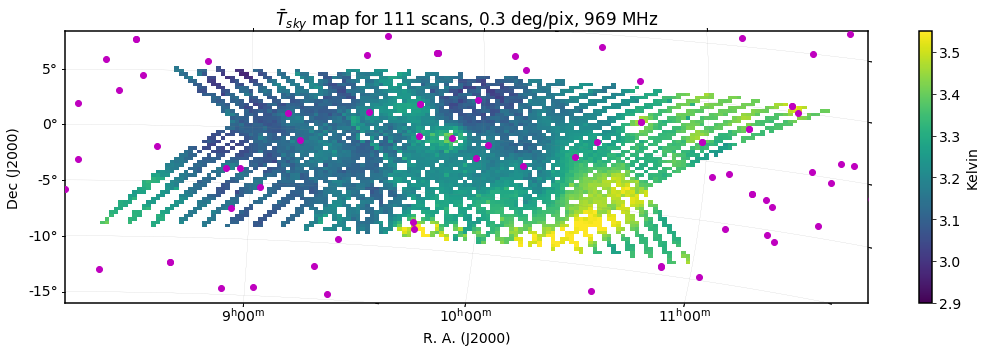

In [44]:
plt.figure(figsize=(18,5))
plt.subplot(projection=w)
plt.grid(color='grey',lw=.1)
plt.imshow(Tsky_xy[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto',vmin=2.9,vmax=3.55)
plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
#plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
plt.colorbar(label='Kelvin')
plt.xlabel('R. A. (J2000)')
plt.ylabel('Dec (J2000)')
plt.title(r'$\bar T_{sky}$'+' map for '+str(total_count_plot)+' scans, '+str(pix_deg)+' deg/pix, '
                              +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
#plt.savefig('F_Tsky_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
plt.show()


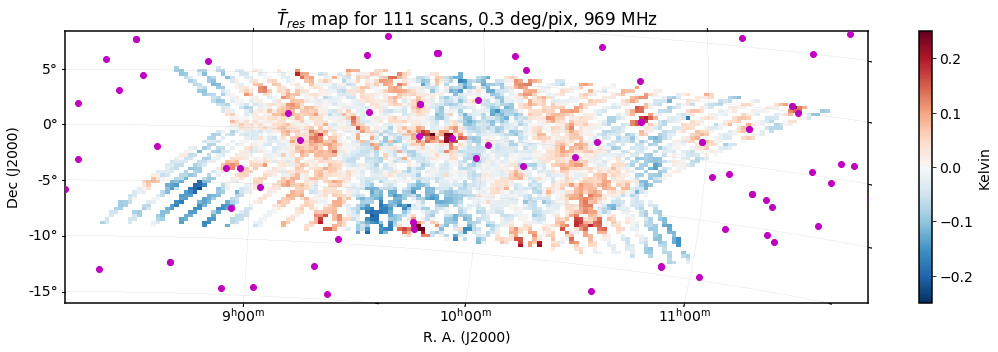

In [45]:

plt.figure(figsize=(18,5))
plt.subplot(projection=w)
plt.grid(color='grey',lw=.1)
plt.imshow(Tresi_xy[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto',vmin=-0.25,vmax=0.25)
plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
#plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
plt.colorbar(label='Kelvin')
plt.xlabel('R. A. (J2000)')
plt.ylabel('Dec (J2000)')
plt.title(r'$\bar T_{res}$'+' map for '+str(total_count_plot)+' scans, '+str(pix_deg)+' deg/pix, '
                              +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
#plt.savefig('F_Tsky_all_ch'+str(ch_plot)+'_iter'+str(i_iter)+'.pdf', bbox_inches='tight')
plt.show()


In [46]:
total_count_plot1=total_count

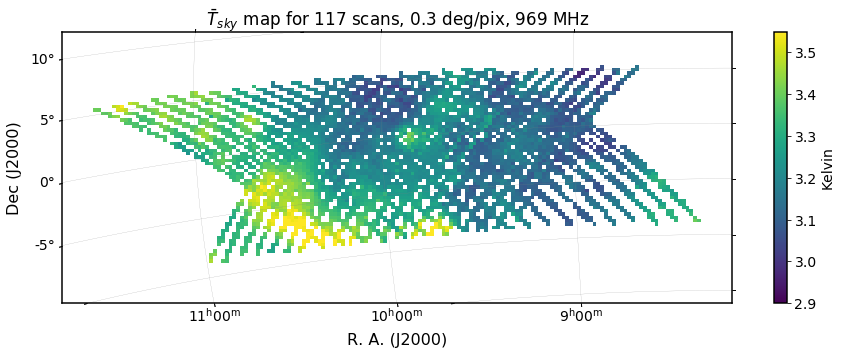

In [49]:
plt.figure(figsize=(15,5))
ax=plt.subplot(projection=w2)
plt.grid(color='grey',lw=.15)
plt.imshow(cube0[:,:,ch_plot].T,cmap=kv.cmap1(),aspect='auto', vmin=2.9,vmax=3.55)
#plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
plt.colorbar(label='Kelvin')
plt.xlabel('R. A. (J2000)',fontsize=16)
plt.ylabel('Dec (J2000)',fontsize=16)
plt.title(r'$\bar T_{sky}$'+' map for '+str(total_count_plot1)+' scans, '+str(pix_deg)+' deg/pix, '
                               +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
# plt.xlim([15,Npix_x-15])
# plt.ylim([0,Npix_y])
ax.invert_xaxis()
plt.savefig('ALL2.png', bbox_inches='tight')
plt.show()

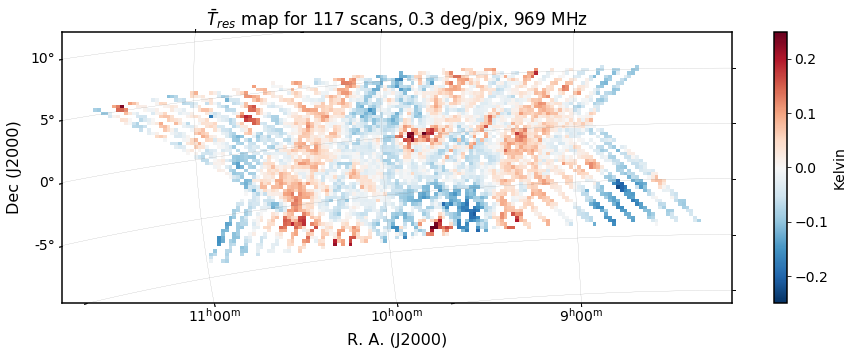

In [50]:
plt.figure(figsize=(15,5))
ax=plt.subplot(projection=w2)
plt.grid(color='grey',lw=.15)
plt.imshow(cube1[:,:,ch_plot].T,cmap=kv.cmap2(),aspect='auto', vmin=-0.25,vmax=0.25)
#plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
plt.colorbar(label='Kelvin')
plt.xlabel('R. A. (J2000)',fontsize=16)
plt.ylabel('Dec (J2000)',fontsize=16)
plt.title(r'$\bar T_{res}$'+' map for '+str(total_count_plot1)+' scans, '+str(pix_deg)+' deg/pix, '
                                  +str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
# plt.xlim([15,Npix_x-15])
# plt.ylim([0,Npix_y])
ax.invert_xaxis()
plt.savefig('ALL2.png', bbox_inches='tight')
plt.show()

In [51]:
aa=cube1[:,:,ch_plot]
aa=aa[~np.isnan(aa)]
print (np.shape(aa))
print (np.mean(aa))

(3997,)
-0.0032932415584295037


In [52]:
rms1 = np.sqrt(np.mean(np.square(aa)))
print (rms1)
print (str(round(rms1*1e3,2))+' mK')

0.06478200410406788
64.78 mK


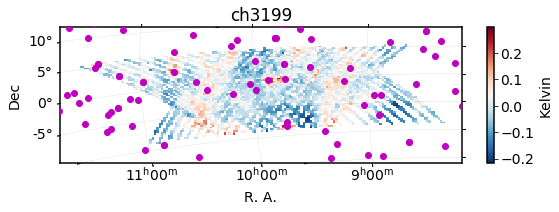

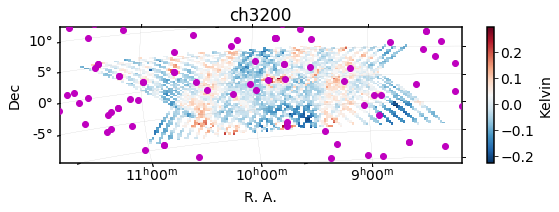

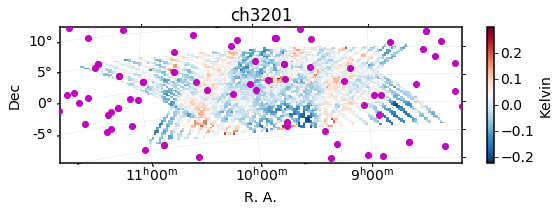

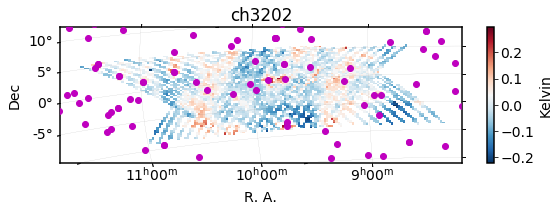

In [53]:
for ch_i in [ch_plot-1,ch_plot,ch_plot+1,ch_plot+2]:
    plt.figure(figsize=(9,2.5))
    ax=plt.subplot(projection=w2)
    plt.grid(color='grey',lw=.1)
    plt.imshow(cube1[:,:,ch_i].T,cmap=kv.cmap2(),aspect='auto')#, vmin=-0.25,vmax=0.25)
    plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
    plt.colorbar(label='Kelvin')
    plt.xlabel('R. A.')
    plt.ylabel('Dec')
    plt.xlim([0,Npix_x])
    plt.ylim([0,Npix_y])
    plt.title('ch'+str(ch_i))
    ax.invert_xaxis()
    #plt.plot('test B')
    plt.show()

In [54]:
#ABBA 
bb0=(cube0[:,:,ch_plot]+cube0[:,:,ch_plot+1])/2.-(cube0[:,:,ch_plot-1]+cube0[:,:,ch_plot+2])/2.
bb1=(cube1[:,:,ch_plot]+cube1[:,:,ch_plot+1])/2.-(cube1[:,:,ch_plot-1]+cube1[:,:,ch_plot+2])/2.

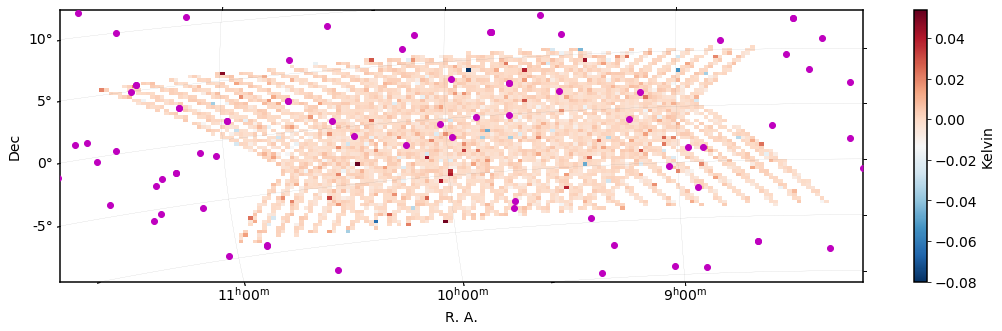

In [55]:
plt.figure(figsize=(18,5))
ax=plt.subplot(projection=w2)
plt.grid(color='grey',lw=.1)
plt.imshow(bb0.T,cmap=kv.cmap2(),aspect='auto')
plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
plt.colorbar(label='Kelvin')
plt.xlabel('R. A.')
plt.ylabel('Dec')
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
ax.invert_xaxis()
#plt.plot('test B')
plt.show()

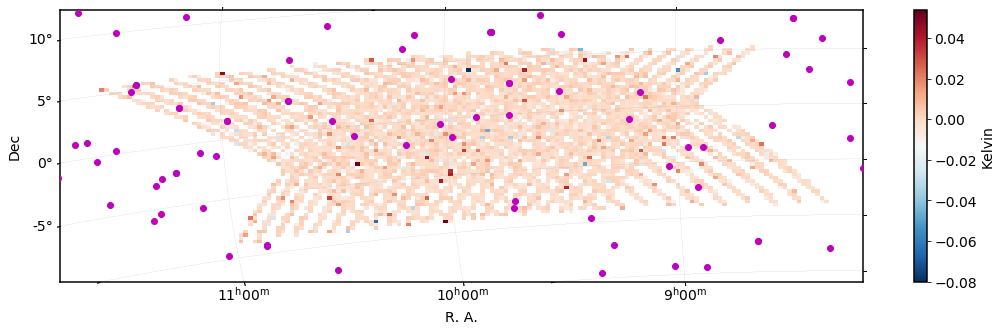

In [56]:
plt.figure(figsize=(18,5))
ax=plt.subplot(projection=w2)
plt.grid(color='grey',lw=.1)
plt.imshow(bb1.T,cmap=kv.cmap2(),aspect='auto')
plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
plt.colorbar(label='Kelvin')
plt.xlabel('R. A.')
plt.ylabel('Dec')
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
ax.invert_xaxis()
#plt.plot('test B')
plt.show()

In [57]:
bb0=bb0[~np.isnan(bb0)]
print (np.shape(bb0))
print (np.mean(bb0))

(3997,)
-4.7331674348641724e-05


In [58]:
rms2 = np.sqrt(np.mean(np.square(bb0)))
print (rms2)
print (str(round(rms2*1e3,2))+' mK')

0.00574370142958737
5.74 mK


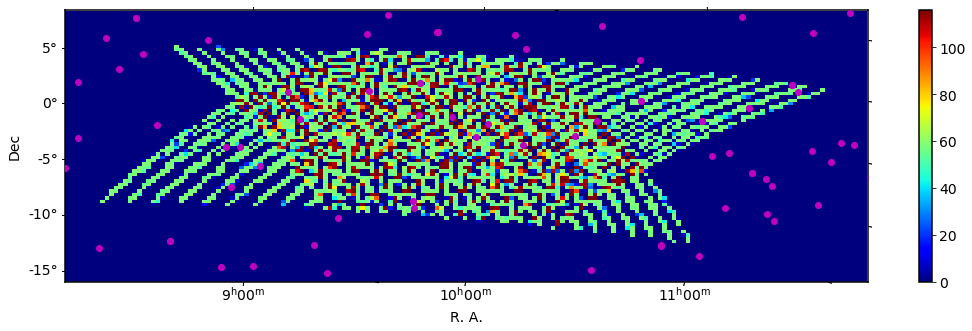

In [59]:
plt.figure(figsize=(18,5))
plt.subplot(projection=w2)
plt.imshow(cube2[:,:,ch_plot].T,cmap='jet',aspect='auto')
plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
plt.colorbar()
plt.xlabel('R. A.')
plt.ylabel('Dec')
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
plt.show()

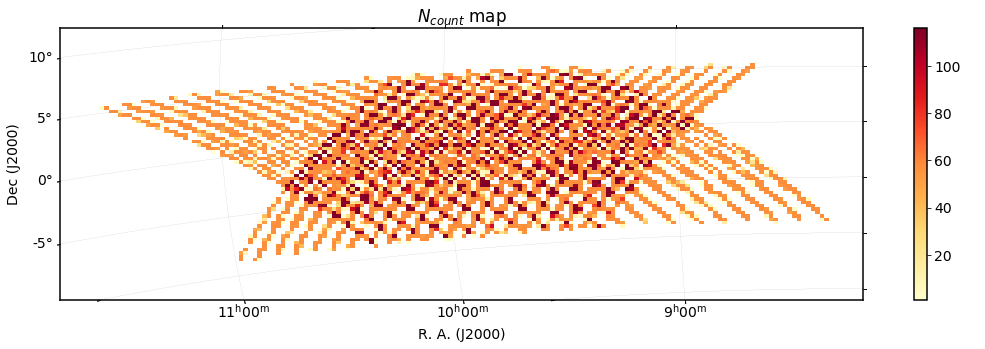

In [60]:
map_2=cube2.copy() #Ncount
map_22=np.ma.array(map_2,mask=True)
map_22.mask[~np.isnan(map_2)]=False
map_22.mask[map_2==0]=True

plt.figure(figsize=(18,5))
ax=plt.subplot(projection=w)
plt.grid(color='grey',lw=.1)
plt.imshow(map_22[:,:,ch_plot].T,cmap='YlOrRd', aspect='auto')
#plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
#plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
plt.colorbar(label='  ')
plt.xlabel('R. A. (J2000)')
plt.ylabel('Dec (J2000)')
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
ax.invert_xaxis()
plt.title(r'$N_{count}$'+' map')
plt.savefig('Ncount_'+str(ch_plot)+'_final.pdf', bbox_inches='tight')
plt.show()


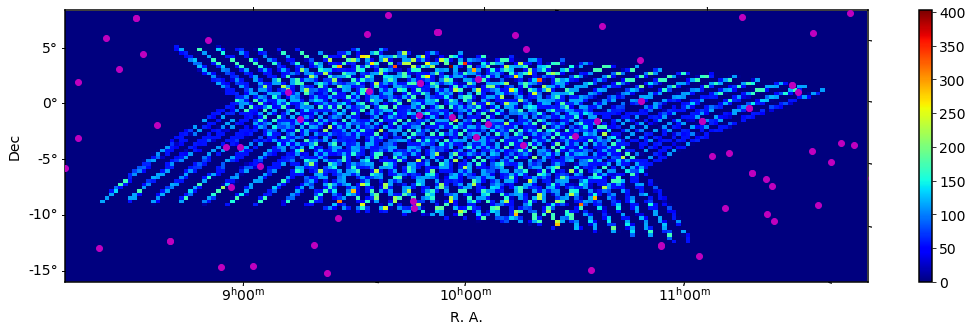

In [61]:
plt.figure(figsize=(18,5))
plt.subplot(projection=w2)
plt.imshow(cube3[:,:,ch_plot].T,cmap='jet',aspect='auto')
plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
plt.colorbar()
plt.xlabel('R. A.')
plt.ylabel('Dec')
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
plt.show()

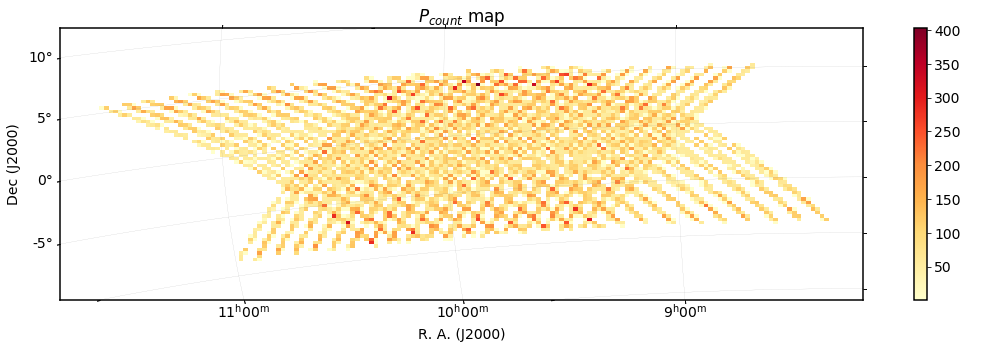

In [62]:
map_3=cube3.copy() #Ncount
map_33=np.ma.array(map_3,mask=True)
map_33.mask[~np.isnan(map_3)]=False
map_33.mask[map_3==0]=True

plt.figure(figsize=(18,5))
ax=plt.subplot(projection=w)
plt.grid(color='grey',lw=.1)
plt.imshow(map_33[:,:,ch_plot].T,cmap=kv.cmap3(), aspect='auto')
#plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
#plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
plt.colorbar(label='  ')
plt.xlabel('R. A. (J2000)')
plt.ylabel('Dec (J2000)')
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
ax.invert_xaxis()
plt.title(r'$P_{count}$'+' map')
plt.savefig('Pcount_'+str(ch_plot)+'_final.pdf', bbox_inches='tight')
plt.show()


In [63]:
#test below

Text(0,0.5,'scan count')

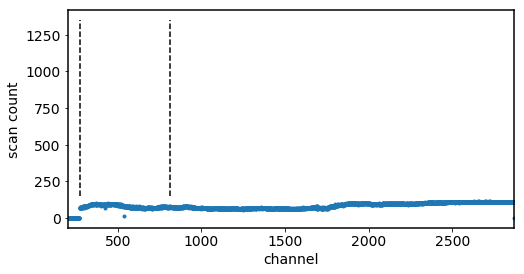

In [64]:
plt.figure(figsize=(8,4))
plt.plot(total_count_list,'.')
plt.plot(ch_plot,total_count_plot,'r*')
plt.xlim(200,2868)
plt.plot([272,272],[150,1350],'k--')
plt.plot([810,810],[150,1350],'k--')
plt.xlabel('channel')
plt.ylabel('scan count')

In [65]:
print (kio.cal_freq_UHF(272)/1e6,kio.cal_freq_UHF(810)/1e6)

580.125 651.578125


In [66]:
total_count

117

In [67]:
freqs=kio.cal_freqs_UHF(range(4096))
freqs = np.array(freqs)

In [68]:
total_count_list0=np.loadtxt(output_file+'ALL_scan'+str(total_count)+'_list_p'+str(pix_deg)+'d.dat')
#scan_count_list=np.loadtxt('Nscan366_list_p0.3d_sigma2.5_iter2.dat')
scan_count_list=np.loadtxt('ALL_scan966_list_p0.3d.dat')
plt.figure(figsize=(8,5))
plt.plot([freqs[0]/1e6,freqs[-1]/1e6],[total_count,total_count], 'k--')
plt.plot(freqs/1e6, total_count_list0,'.',color='grey')
plt.plot(freqs/1e6, scan_count_list,'.')
plt.legend(['total number of scans (966)','number of calibrated scans in each channel', 'number of scans after weak RFI flagging'],fontsize=14)
#plt.ylim(0,530)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Count')
plt.savefig('F_count_comp_final.pdf', bbox_inches='tight')
plt.show()

OSError: ALL_scan966_list_p0.3d.dat not found.

In [ ]:
for i in range(4096):
    plt.plot(kio.cal_freq_UHF(i)/1e6, scan_count_list[i]/total_count,'.')
plt.show()    

In [ ]:
a_dat=[]
for i in range(4096):
    a_dat.append([kio.cal_freq_UHF(i)/1e6, scan_count_list[i]/total_count])
a_dat=np.array(a_dat)

np.savetxt('freq_MHz_vs_good_scan_ratio.dat',a_dat)
    

In [ ]:
a_list=np.loadtxt('freq_MHz_vs_good_scan_ratio.dat')

In [ ]:
(a_dat==a_list).all()

In [ ]:
plt.plot(a_list[:,0],a_list[:,1],'.')
plt.show()

In [ ]:
#test above

# the Galactic model

In [ ]:
nside=64 #healpix nside, 64: Mean Spacing (deg) is 0.9161
import pysm
from pysm.nominal import models


In [ ]:
def cal_Gal_pix (pix_ra, pix_dec, freq, nside):
    sky_config = {
        'synchrotron': models("s1", nside),
    }

    sky = pysm.Sky(sky_config)
    
    c = SkyCoord(ra=pix_ra * u.degree, dec=pix_dec * u.degree, frame='icrs')
    theta = 90 - (c.galactic.b / u.degree).value
    phi = (c.galactic.l / u.degree).value
        
    syn = sky.synchrotron(nu=freq/1e9) / 1e6  # K
    I = hp.pixelfunc.get_interp_val(syn[0, :], theta / 180 * np.pi, phi / 180 * np.pi)
        
    return I


In [ ]:
total_count=total_count
model_key=0 #0 for full band count, to achieve a good sky coverage; 
            #1 for Tresi map, to have same coverage as Tresi in certain channel

if model_key==1:
    #Fits='/idia/projects/hi_im/raw_vis/katcali_output/level6_output/p'+str(pix_deg)+'d/p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'/Nscan'+str(total_count)+'_Tresi_cube_p'+str(pix_deg)+'d_sigma'+str(std_sigma)+'_iter'+str(i_iter)+'.fits'
    Fits='ALL_scan966_Tresi_cube_p0.3d.fits'
    cube = fits.open(Fits)[0].data
    print (np.shape(cube))
    a=np.where(~np.isnan(cube[:,:,ch_plot]))
    print (np.shape(a))
    
if model_key==0:
    #Fits='/idia/projects/hi_im/raw_vis/katcali_output/level6_output/p0.3d/ALL/ALL_scan366_Npix_count_cube_p0.3d.fits'
    Fits='ALL_scan966_Npix_count_cube_p0.3d.fits'
    cube = fits.open(Fits)[0].data
    print (np.shape(cube))
    #cube1=np.sum(cube,axis=2)
    cube1=cube[:,:,ch_plot]
    a=np.where(cube1>0)
    print (np.shape(a))

In [ ]:

pix_list_x=np.array(a[0])
pix_list_y=np.array(a[1])

In [ ]:
pix_radec=pixel_to_skycoord(pix_list_x,pix_list_y,w)
pix_ra,pix_dec=(pix_radec.ra/u.deg).value,(pix_radec.dec/u.deg).value

In [ ]:
gal_pix=np.zeros([Npix_x,Npix_y])
gal_pix[pix_list_x,pix_list_y]=cal_Gal_pix (pix_ra, pix_dec, kio.cal_freq_UHF(ch_plot), nside)    

if model_key==1: #1 for Tresi map, to have same coverage as Tresi in certain channel
    gal_pix[np.isnan(cube[:,:,ch_plot])]=np.nan
if model_key==0: #0 for full band count, to achieve a good sky coverage; 
    gal_pix[np.where(cube1==0)]=np.nan



In [ ]:
Tcmb

In [ ]:
plt.figure(figsize=(18,5))
ax=plt.subplot(projection=w)
plt.grid(color='grey',lw=.1)
plt.imshow(gal_pix.T,cmap=kv.cmap1(),aspect='auto',vmin=2.9-Tcmb,vmax=3.55-Tcmb)
#plt.plot(ptr_ra_pix,ptr_dec_pix,'mo')
#plt.plot(ptr_ra_pix[22],ptr_dec_pix[22],'mo',ms=12)
plt.colorbar(label='Kelvin')
plt.xlabel('R. A. (J2000)')
plt.ylabel('Dec (J2000)')
plt.title('Galactic model at '+str(int(kio.cal_freq_UHF(ch_plot)/1e6))+' MHz')
plt.xlim([0,Npix_x])
plt.ylim([0,Npix_y])
ax.invert_xaxis()
plt.savefig('F_Tgal_model_ch'+str(ch_plot)+'.pdf', bbox_inches='tight')
plt.show()

In [ ]:
print ('end @ ' + time.asctime(time.localtime(time.time())) +'#')